In [2]:
import scipy.stats as sps
import json
import numpy as np
import joblib
from main import plot,load_data
import matplotlib.pyplot as plt
from mave_calibration.skew_normal import density_utils

from main import singleFit
import seaborn as sns

/home/dz/research/mave_calibration/main.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
dataset_id = "urn_mavedb_00000054-a-1"
config_name = "missense_config"
data_directory = "/mnt/d/mave_calibration/data/"
X,S,sample_names = load_data(dataset_id=dataset_id,
                            config_name=config_name,
                            data_directory=data_directory)
with open(f"/mnt/d/mave_calibration/results/missense_config/{dataset_id}/result.json") as f:
    result = json.load(f)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/d/mave_calibration/results/missense_config/urn_mavedb_00000054-a-1/result.json'

In [58]:
individual_fits = {}
for i,sample_name in enumerate(sample_names):
    xi = X[S[:,i]]
    individual_fits[sample_name] = singleFit(xi, np.ones((len(xi),1),dtype=bool),max_iters=10000)

  1%|▏         | 131/10000 [00:07<08:55, 18.43it/s, likelihood=-1.415800]


In [62]:
sample_names

['pathogenic_missense', 'synonymous', 'missense']

In [63]:
individual_fits['pathogenic_missense']

([(2.8883505898814126, -1.8523164662137854, 0.7002140278394612),
  (3.373307194029222, 0.764122552965857, 0.31033472527034006)],
 array([[0.94956283, 0.05043717]]),
 array([-0.76218284, -0.76217626, -0.76217252, -0.76217102, -0.76216979,
        -0.76216927, -0.76216884, -0.76216871, -0.76216852, -0.76216844,
        -0.76216837, -0.76216831, -0.76216826, -0.76216822, -0.76216822,
        -0.76216819, -0.76216819, -0.76216819, -0.76216819, -0.76216819,
        -0.76216819, -0.76216819, -0.76216819, -0.76216819, -0.76216819,
        -0.76216819, -0.76216819, -0.76216819, -0.76216819, -0.76216819,
        -0.76216819, -0.76216819, -0.76216819, -0.76216819, -0.76216819,
        -0.76216819, -0.76216819, -0.76216819, -0.76216819, -0.76216819,
        -0.76216819, -0.76216819, -0.76216819, -0.76216819, -0.76216819,
        -0.76216819, -0.76216819, -0.76216819, -0.76216819, -0.76216819,
        -0.76216819, -0.76216819, -0.76216819, -0.76216819, -0.76216819,
        -0.76216819, -0.76216819

In [68]:
individual_fits['pathogenic_missense'][1][0]

array([0.94956283, 0.05043717])

Text(0, 0.5, 'Relative Entropy')

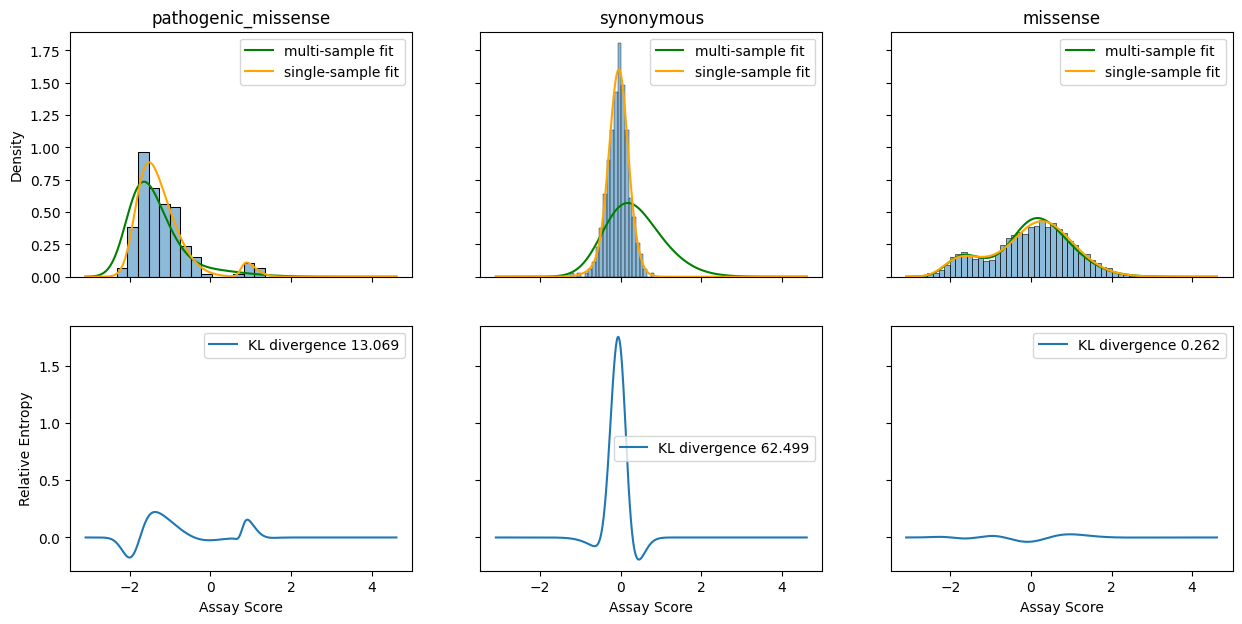

In [69]:
rng = np.arange(X.min() - .25,X.max() + .25 ,.01)
fig,ax = plt.subplots(2,3,figsize=(15,7),sharey='row',sharex=True)
for i, k in enumerate(sample_names):
    value = individual_fits[k]
    densities = density_utils.joint_densities(rng, value[0],value[1][0])
    multisample_densities = density_utils.joint_densities(rng, result['component_params'], result['weights'][i])
    P = densities.sum(0)
    Q = multisample_densities.sum(0)
    ax[0,i].plot(rng, Q,color='green', label='multi-sample fit')
    ax[0,i].plot(rng, P,color='orange',label='single-sample fit')
    sns.histplot(X[S[:,i]],ax=ax[0,i],stat='density',alpha=.5)
    ax[0,i].legend()
    ax[0,i].set_title(k)
    kl = P * np.log(P/Q)
    ax[1,i].plot(rng, kl,label=f"KL divergence {kl.sum():.3f}")
    ax[1,i].legend()
    ax[1,i].set_xlabel("Assay Score")
ax[1,0].set_ylabel("Relative Entropy")